# Support Vector Machine

## history
extremely popular around the time it was developed in 1990s

## data prepare

In [2]:
import pandas as pd
SVM_data = pd.read_csv('SVM_data.txt', delimiter=' ')

(0.0, 4.377844129)

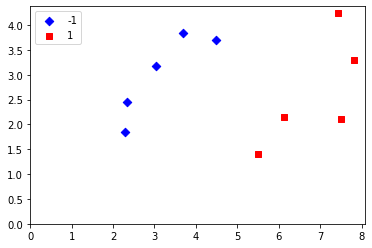

In [3]:
import matplotlib.pyplot as plt 
plt.scatter(SVM_data.iloc[:5,0], SVM_data.iloc[:5,1], c="blue", marker="D", label="-1")
plt.scatter(SVM_data.iloc[5:,0], SVM_data.iloc[5:,1], c="red", marker="s", label="1")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)

## formulation
$$B0 + B1*X1 + B2*X2 = 0$$

### coefficient update
$$output = Y * B1*X1 + B2*X2$$

$$b = (1-\frac{1}{t})*b$$
b, any weight to be updated

$$b = (1-\frac{1}{t})*b + \frac{1}{lambda*t}*y*x$$
lambda, a parameter to learning algorithm, usually <0.0001

In [34]:
B1, B2 = 0, 0
lam = 0.5
acc = []

In [45]:
for epoch in range(16):
    for t in range(len(SVM_data)):
        Y = SVM_data.iloc[t, 2]
        X1 = SVM_data.iloc[t, 0]
        X2 = SVM_data.iloc[t, 1]

        ite = (epoch)*10+(t+1)

        output = Y * B1 * X1 + B2 * X2
        if output > 1: 
            # not a support vector
            B1 = (1-1/ite) * B1
            B2 = (1-1/ite) * B2
        else: 
            # is a support vector
            B1 = (1-1/ite) * B1 + 1/(lam*ite) * Y * X1
            B2 = (1-1/ite) * B2 + 1/(lam*ite) * Y * X2
    
    correct_pred = 0
    for t in range(len(SVM_data)):
        Y = SVM_data.iloc[t, 2]
        X1 = SVM_data.iloc[t, 0]
        X2 = SVM_data.iloc[t, 1]
        output = B1 * X1 + B2 * X2
        Ypred = -1 if output<0 else 1
        SVM_data.loc[t, "Ypred"] = Ypred
        correct_pred += 1 if Y==Ypred else 0
    acc.append(correct_pred/10)

In [26]:
print(B1, B2)

0.7211952765625005 -1.2157085194750004


In [38]:
print(acc)

[0.5, 0.8, 0.8, 0.8, 0.8, 1.0, 1.0, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'learing accuracy')

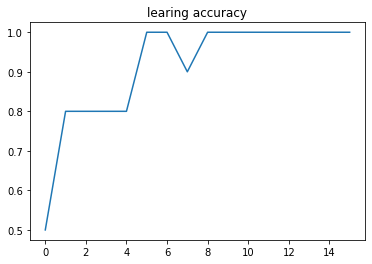

In [44]:
plt.plot(acc)
plt.title('learing accuracy')

(0.0, 4.983135534610836)

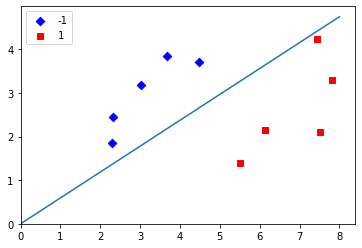

In [54]:
import numpy as np
x = np.linspace(0, 8, 100)
plt.plot(x, -B1/B2*x)

plt.scatter(SVM_data.iloc[:5,0], SVM_data.iloc[:5,1], c="blue", marker="D", label="-1")
plt.scatter(SVM_data.iloc[5:,0], SVM_data.iloc[5:,1], c="red", marker="s", label="1")
plt.legend()
plt.xlim(left=0)
plt.ylim(bottom=0)